# Linear Regression Tutorial

In this tutorial we are going to learn about linear regression, how it is optimized and how you can predict house prices using linear regression!

In [1]:
%matplotlib inline
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

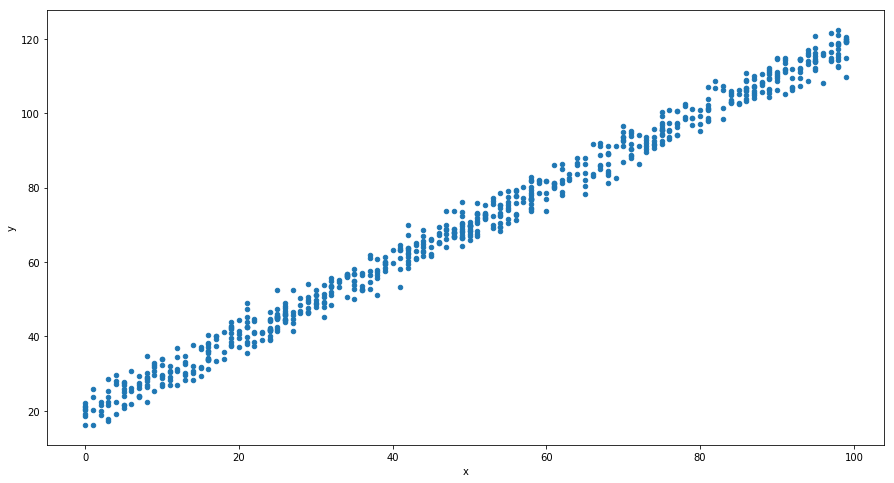

In [3]:
data.plot.scatter('x', 'y', figsize=(15,8))

In [4]:
y = data.y.values

In [5]:
x = data.x.values

In [6]:
reg = SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=10)

In [7]:
reg.fit(data[['x']], y)

/home/martijn/.virtualenvs/codequarantine/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [8]:
from sklearn.metrics import mean_squared_error as mse
preds = reg.predict(data[['x']])

In [9]:
reg.intercept_

array([3.17721936])

In [10]:
mse(y, preds)

79.52525244314762

In [11]:
y

array([ 41.54945196,  67.46446305,  37.21865634,  56.58639803,
       107.28898389,  52.46387493,  30.78089683, 100.7633986 ,
        44.61215147,  26.96331907,  31.23757338,  33.53290206,
        44.60323899,  59.40049976,  68.43753838,  81.69900319,
        46.92832418,  90.4052055 ,  49.34092408,  45.30895192,
        89.02934339, 104.99484703,  77.04310305,  70.5921991 ,
       103.02772202,  77.05752706,  67.95883341,  44.34226432,
       114.68488281,  68.03970696,  27.08132338,  41.99239907,
        62.33151664,  20.32908944,  81.92303698, 111.17716423,
        59.45358014,  25.99606961,  42.59015942,  81.18044414,
       105.02778957,  18.71368911,  81.94273962,  41.96033347,
        53.66194193,  37.60946242,  78.5630564 ,  72.82390762,
        42.1363481 ,  55.07467353, 106.18822311,  62.63227697,
        24.09817744,  81.2229864 ,  37.70677576,  31.85312574,
       100.23051695,  82.64931741,  29.6168598 ,  40.02797699,
        81.7510743 ,  91.61010303,  43.77154623,  71.90

### Make predictions over the data

## $\hat{y} = w_0 + w_1x$

In [12]:
def predict(w0, w1, x):
    predictions = w0 + w1 * x
    return predictions

### Calculate the mean square error 

## $MSE = \frac{1}{N}\sum_{i}^{n}\left ( y_{i} - \hat{y} \right )^{2}$

In [13]:
def cost_function(y, predictions, N):
    errors = y - predictions
    mean_squared_error = np.sum(errors**2)
    mean_squared_error = mean_squared_error / N
    return mean_squared_error

### Update the bias

## $w_{0new} = w_{0current} - \eta   \frac{1}{N}\sum_{i=1}^{n}-2(y_i-\hat{y_i})$

In [14]:
def new_bias(w_current, y,  predictions, learning_rate, N):
    errors = y - predictions
    error = np.sum(errors)
    w_new = w_current - (learning_rate * (-2 * error)/N)
    return w_new

### Update w_1

## $w_{1new} = w_{1current} - \eta   \frac{1}{N}\sum_{i=1}^{n}-2x(y_i-\hat{y_i})$

In [34]:
def update_weight(w_current, X, y, predictions, learning_rate,  N):
    errors = y - predictions
    w_new = w_current - learning_rate *  np.sum(-2 * X * errors) / N
    return w_new

In [21]:
def plot_line(w0, w1):
    x = [0, 100]
    preds = [predict(w0, w1, 0), predict(w0, w1, 100)]
    plt.plot(x, preds, 'r')

error 5622.826154575993
error 3894.942977877525
error 2789.0977447905066
error 2081.356795614814
error 1628.4025881423706
error 1338.511895360007
error 1152.9818519792946


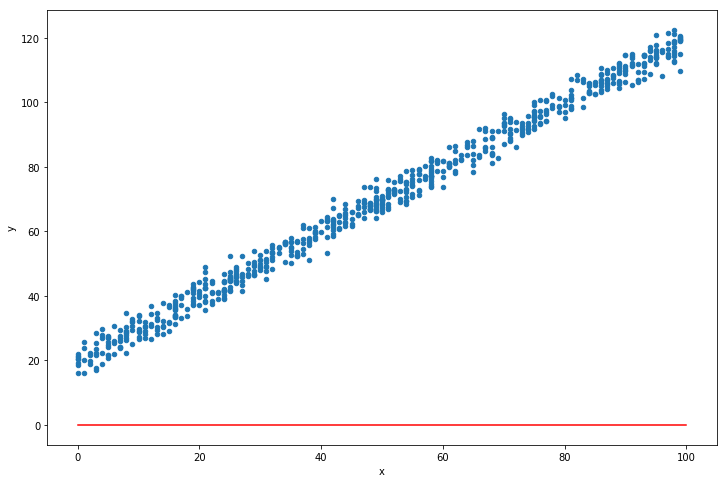

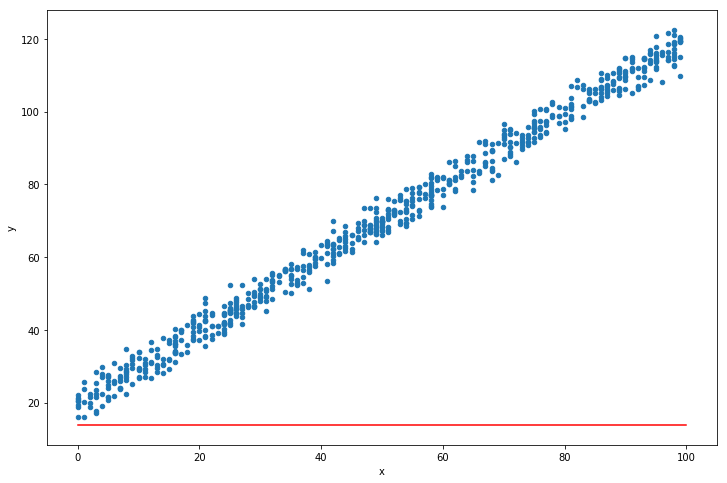

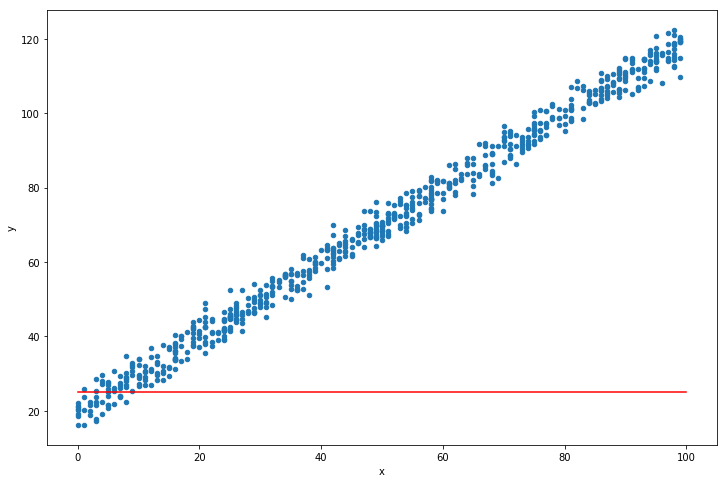

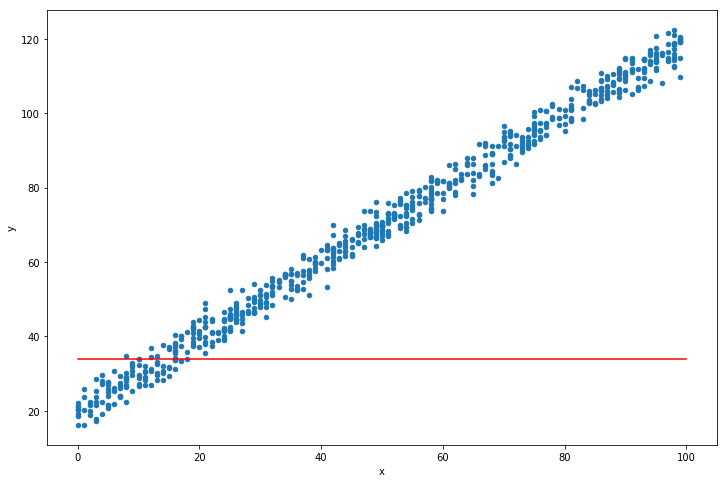

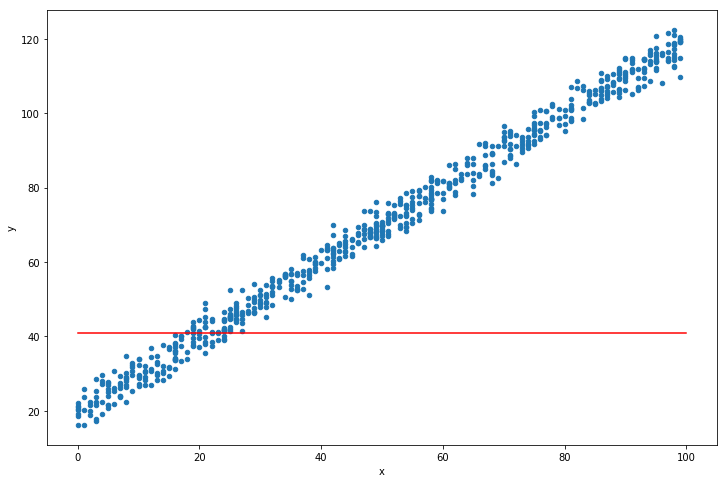

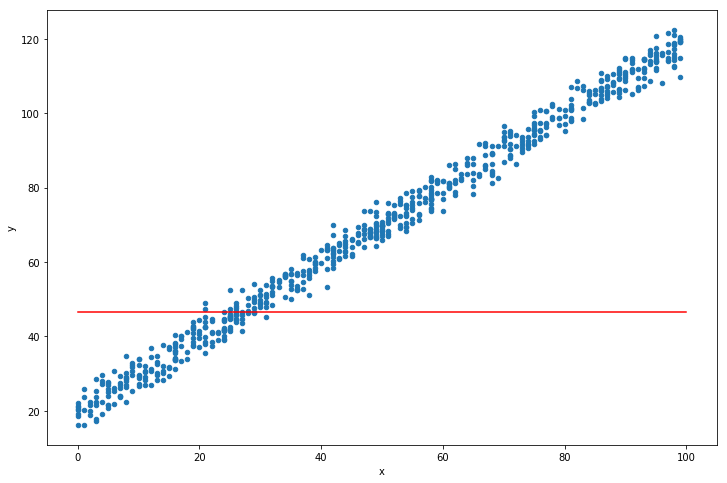

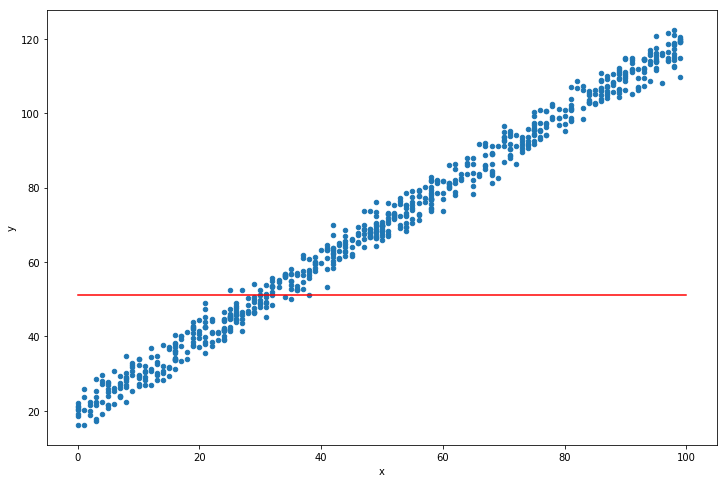

In [22]:
N = len(y)
w_0 = 0
w_1 = 0
learning_rate = 0.1

epochs = 0
while(epochs < 7):
    data.plot.scatter('x', 'y', figsize=(12, 8))
    plot_line(w_0, w_1)
    predictions = predict(w_0, w_1, x)
    mean_squared_error = cost_function(y, predictions,  N)
    w_0 = new_bias(w_0, y, predictions, learning_rate, N)

    print('error', mean_squared_error)
    epochs += 1

error 5622.826154575993
error 781.4973412282607
error 189.593107583767
error 117.22648360227979
error 108.3788897369124


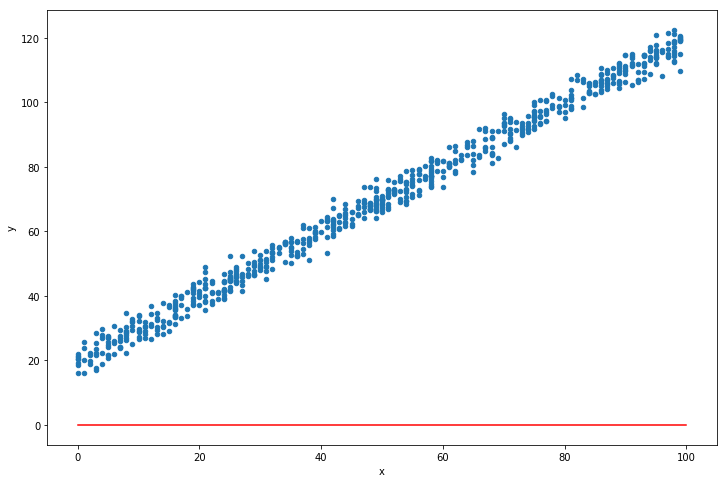

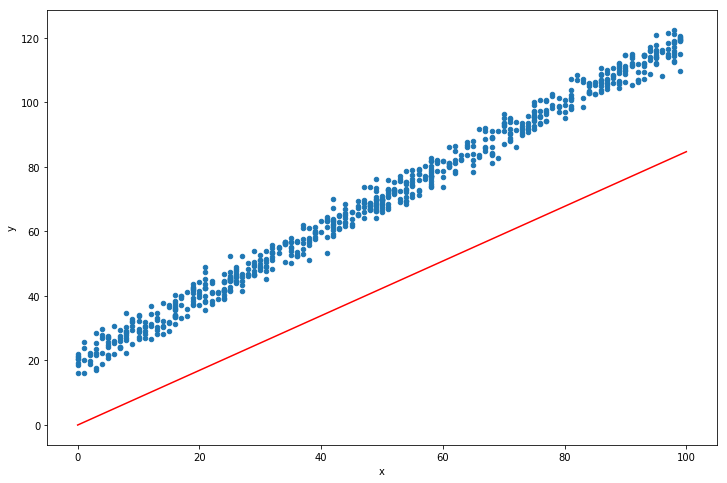

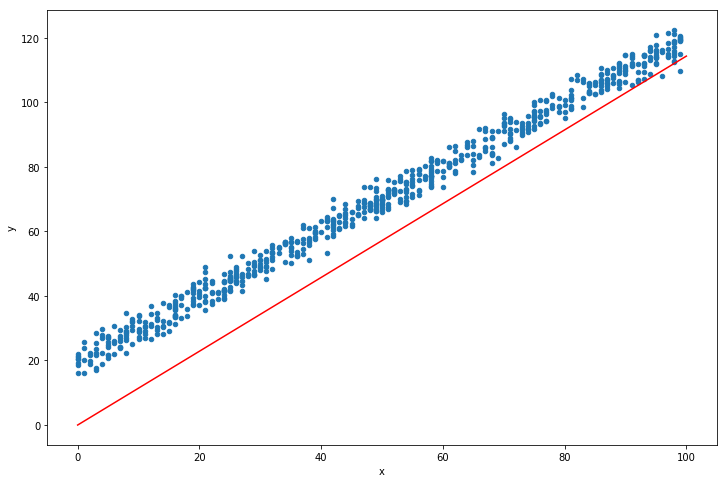

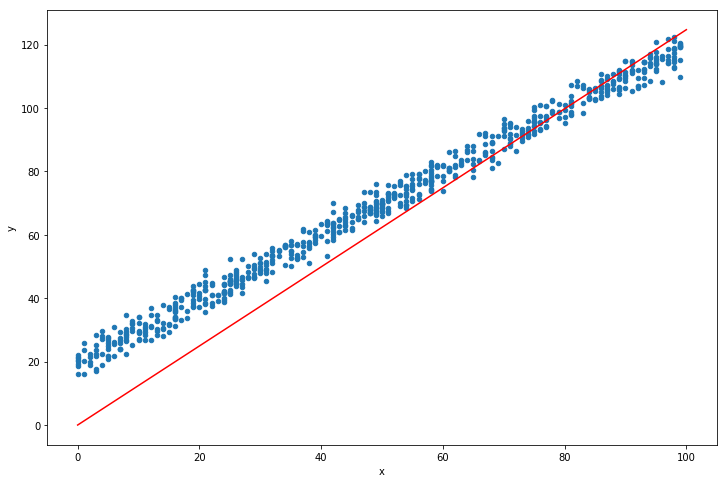

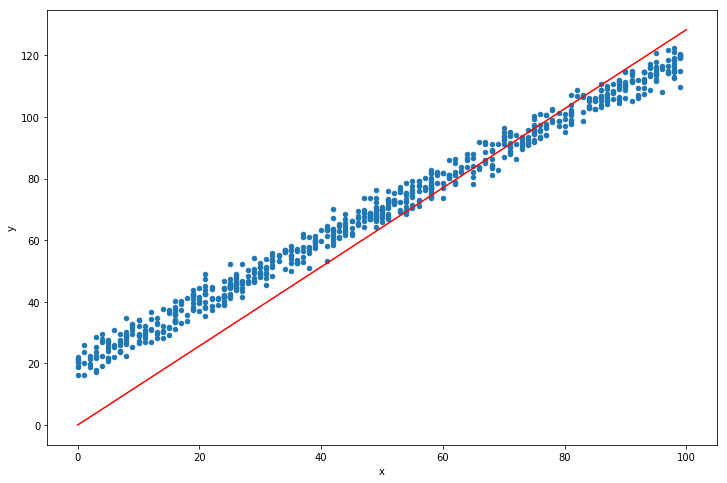

In [35]:
N = len(y)
w_0 = 0
w_1 = 0
learning_rate = 0.0001

epochs = 0
while(epochs < 5):
    data.plot.scatter('x', 'y', figsize=(12, 8))
    plot_line(w_0, w_1)
    predictions = predict(w_0, w_1, x)
    mean_squared_error = cost_function(y, predictions,  N)
    w_1 = update_weight(w_1, x, y, predictions, learning_rate, N)

    print('error', mean_squared_error)
    epochs += 1

error 5622.826154575993
error 780.7362987240689
error 189.2377019721173
error 116.97393200642682
error 108.13776356161893
error 107.04965211463535
error 106.90801246347479
error 106.88199080606982
error 106.8700934434618
error 106.8599223208226


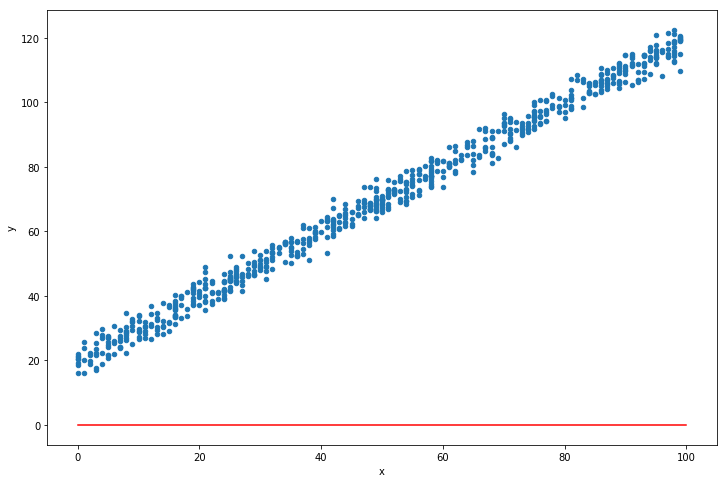

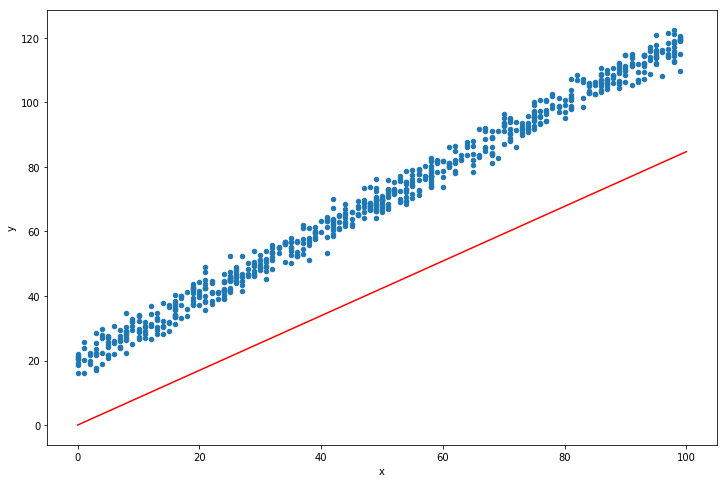

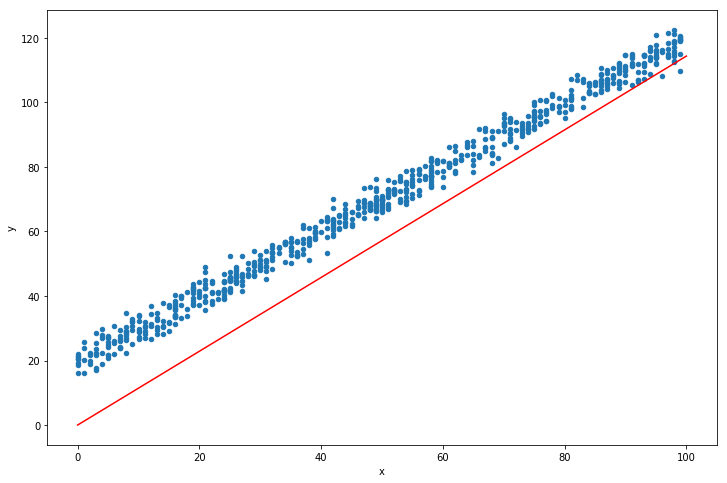

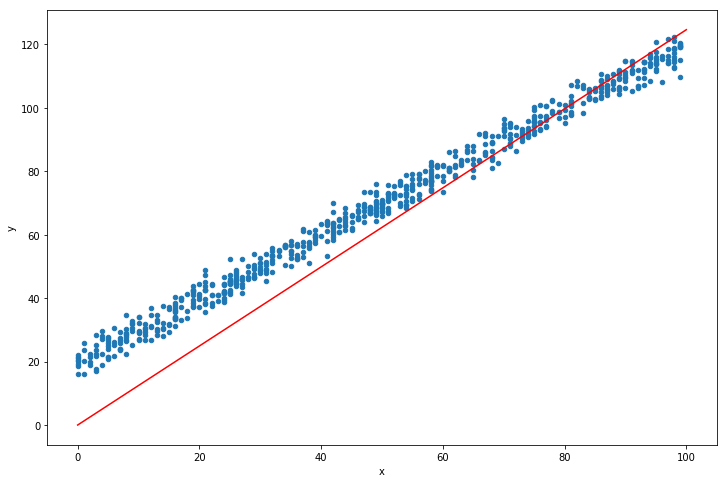

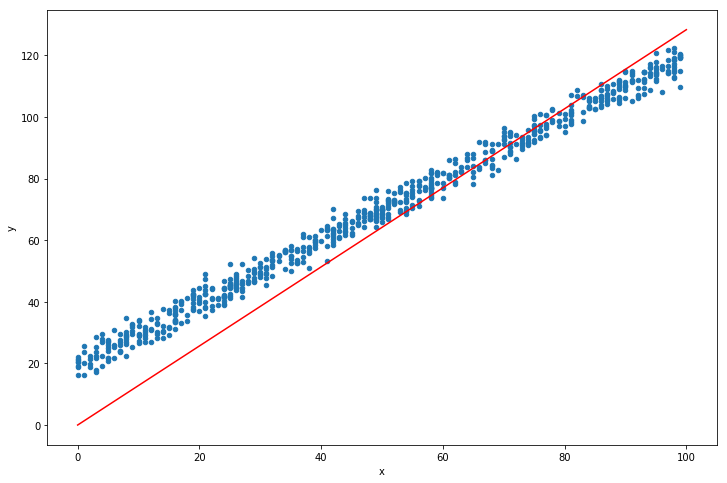

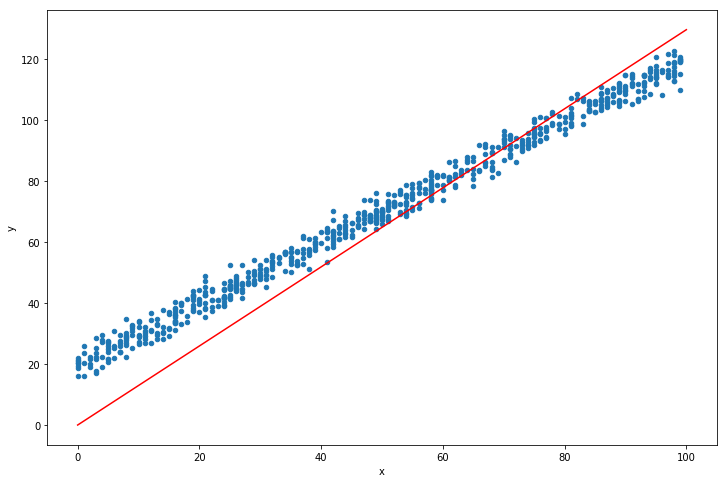

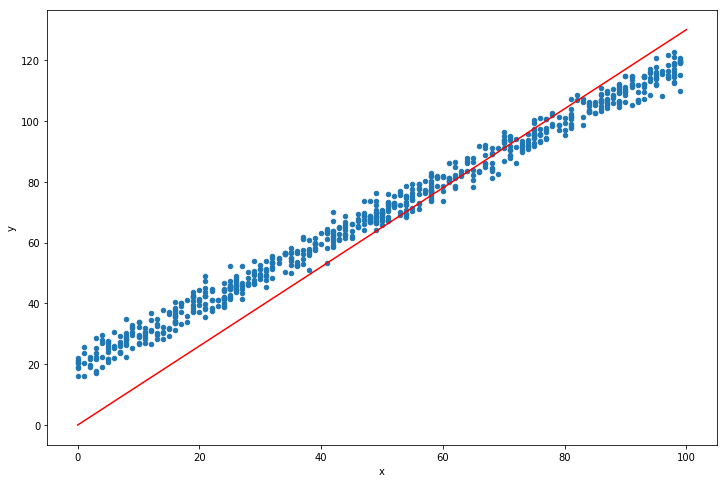

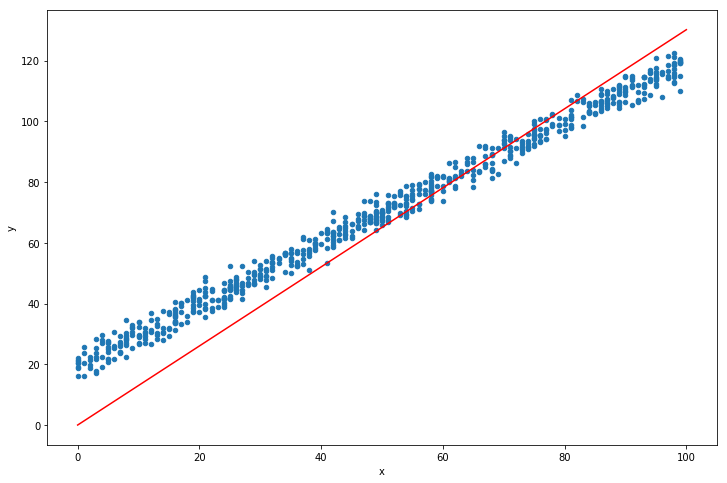

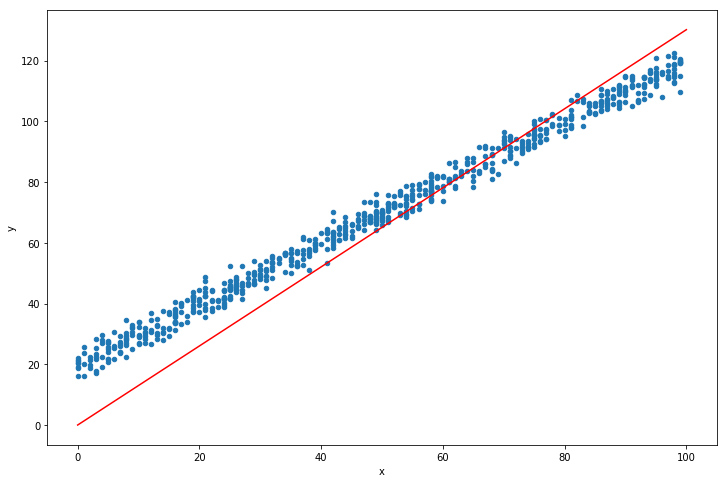

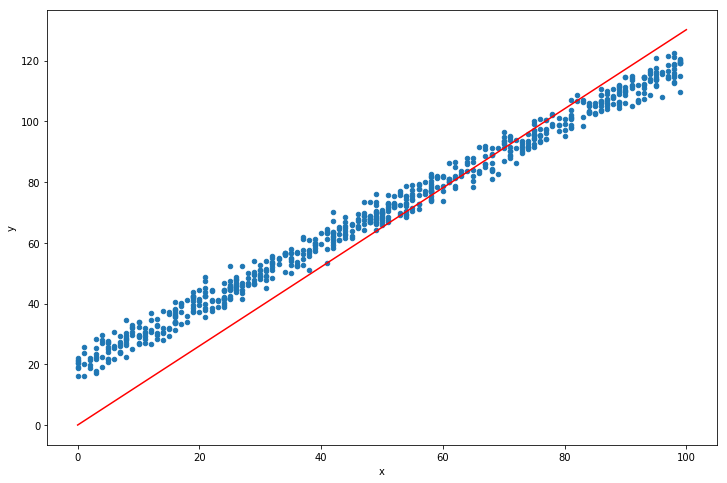

In [38]:
N = len(y)
w_0 = 0
w_1 = 0
learning_rate = 0.0001

epochs = 0
while(epochs < 10):
    data.plot.scatter('x', 'y', figsize=(12, 8))
    plot_line(w_0, w_1)
    predictions = predict(w_0, w_1, x)
    mean_squared_error = cost_function(y, predictions,  N)
    w_0 = new_bias(w_0, y, predictions, learning_rate, N)
    w_1 = update_weight(w_1, x, y, predictions, learning_rate, N)

    print('error', mean_squared_error)
    epochs += 1

IndexError: invalid index to scalar variable.

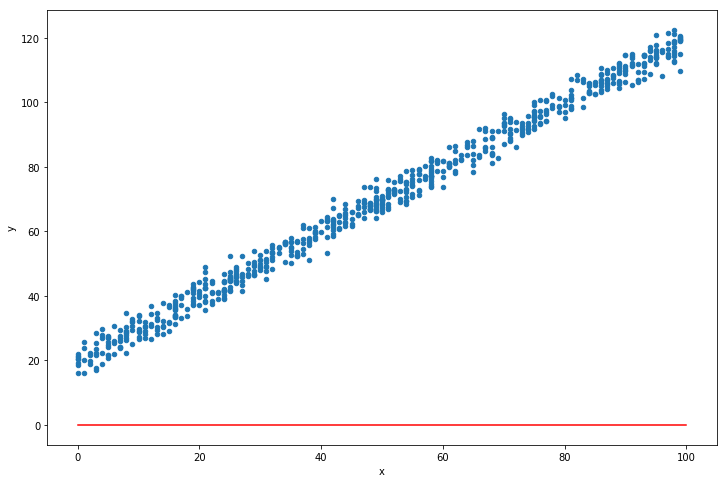

In [42]:
#SGD
N = len(y)
w_0 = 0
w_1 = 0
learning_rate = 0.0001

epochs = 0
while(epochs < 10):
    data.plot.scatter('x', 'y', figsize=(12, 8))
    plot_line(w_0, w_1)
    for i in range(len(x)):
        predictions = w_0 + w_1 * x[i]
        mean_squared_error = cost_function(y, predictions,  N)
        w_0 = new_bias(w_0, y[i], predictions[i], learning_rate, N)
        w_1 = update_weight(w_1, x[i], y[i], predictions[i], learning_rate, N)

    print('error', mean_squared_error)
    epochs += 1

# Exercises

Answer the following questions:

- What happens when we change the learning rate up or down?
- What happens if we change the number of epochs?
- What happens if we change the initial value of w_0?

# Using the SKlearn library

In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df[['sqft_living', 'price']].plot.scatter('sqft_living', 'price', figsize=(10,10))

In [ ]:
df.shape

In [ ]:
reg = SGDRegressor(eta0=0.000001, random_state=1)

In [ ]:
X = df[['sqft_living']]
y = df.price

In [ ]:
reg.fit(X, y)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X, y)
plt.plot(df.sqft_living, reg.predict(X), color='r')

In [ ]:
preds = reg.predict(X)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# Absolute error
mae(y, preds)

In [ ]:
X = df[['bathrooms']]
y = df.price

In [ ]:
reg = SGDRegressor(eta0=0.0001, random_state=1)
reg.fit(X, y)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X, y)
plt.plot(df.bathrooms, reg.predict(X), color='r')

In [ ]:
preds = reg.predict(X)
mae(y, preds)

## Multiple linear regression

In [ ]:
X = df[['bathrooms', 'sqft_living']]
y = df.price

In [ ]:
reg = SGDRegressor(eta0=0.0000001, random_state=1, max_iter=10000)
reg.fit(X, y)

In [ ]:
preds = reg.predict(X)

In [ ]:
# Absolute error
mae(y, preds)

## Exercise:

- Try out a few more columns to perform linear regression
- Combine more columns to perform multiple linear regression